In [1]:
#Importing required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
#Reading Data
Start = pd.read_csv('50_Startups.csv')
Start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
Start.shape

(50, 5)

In [4]:
Start.info()
#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
Start.duplicated().sum()

0

In [6]:
Start.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
Start.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
Start.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


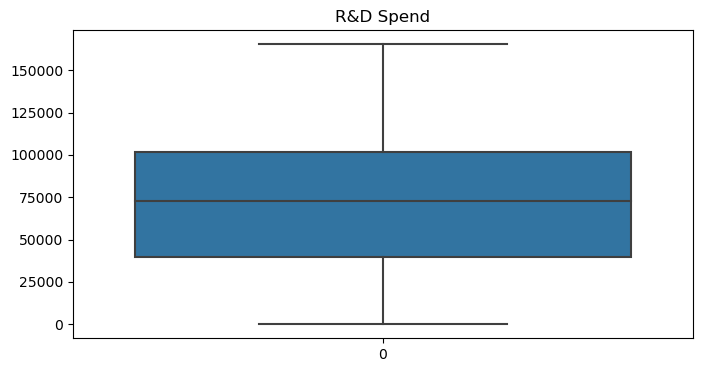

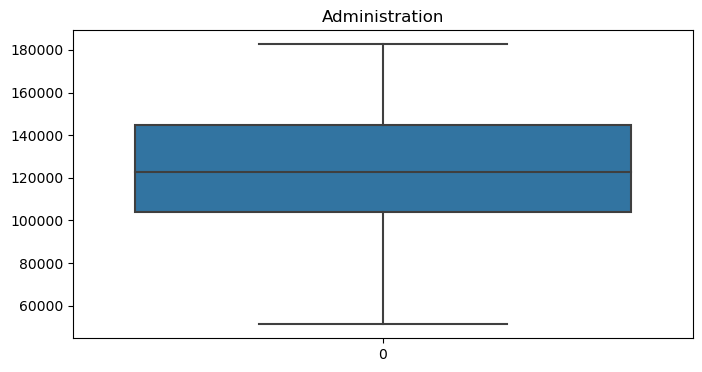

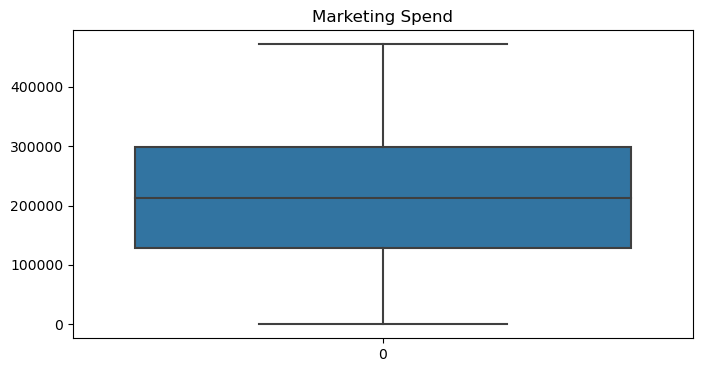

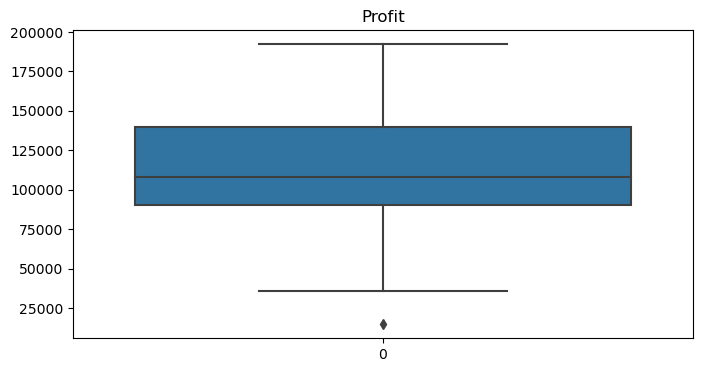

In [10]:
for Var in Start.columns.drop('State'):
    plt.figure(figsize = (8,4))
    sns.boxplot(data= Start[Var])
    plt.title(Var)
    plt.show()

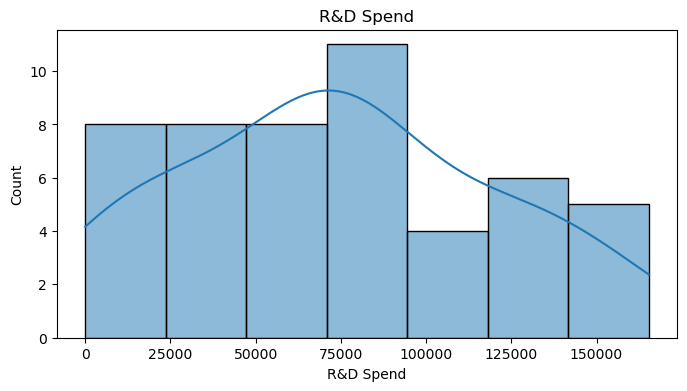

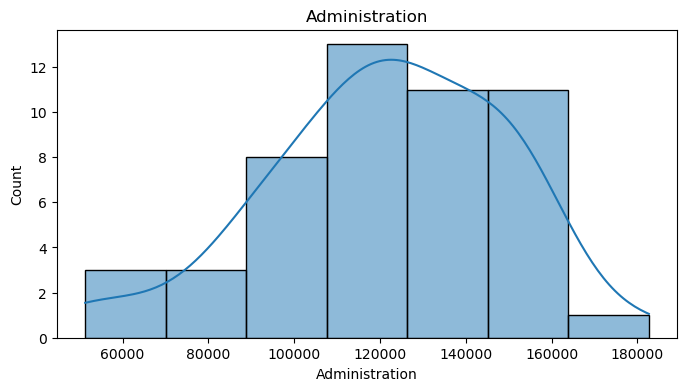

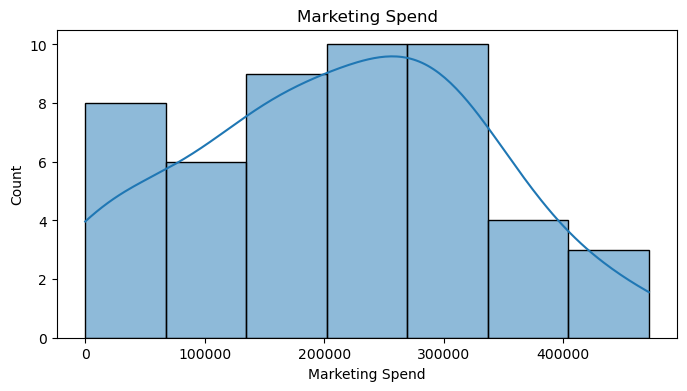

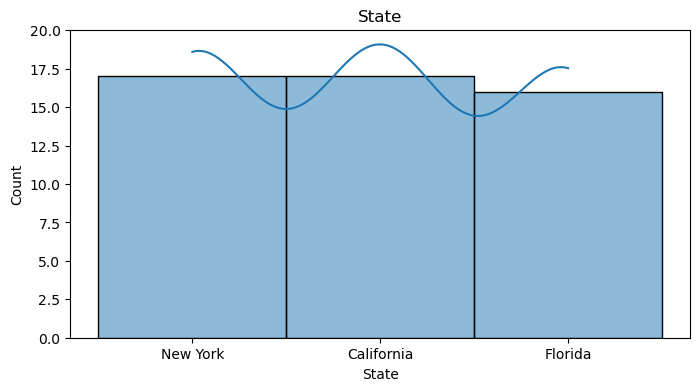

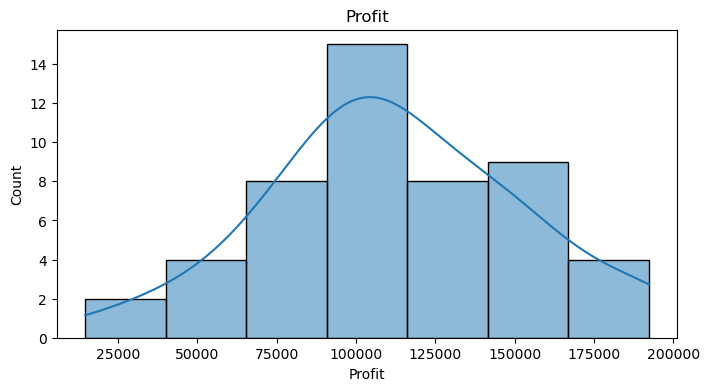

In [11]:
for Var in Start.columns:
    plt.figure(figsize = (8,4))
    sns.histplot(data= Start[Var],kde=True)
    plt.title(Var)
    plt.show()

In [12]:
# Checking for outlier in Proft:
Q3 = Start['Profit'].quantile(q=0.75)
Q1 = Start['Profit'].quantile(q=0.25)
print('IQR : ',1.5*(Q3-Q1))
UpperBoundary = Q3 + 1.5*(Q3-Q1)
print('UpperBoundary : ',UpperBoundary)
LowerBoundary = Q1 - 1.5*(Q3-Q1)
print('LowerBoundary : ',LowerBoundary)

IQR :  74440.61249999997
UpperBoundary :  214206.58999999997
LowerBoundary :  15698.290000000023


In [13]:
Start[Start['Profit']<LowerBoundary]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [14]:
#I'll replace the Profit with lower boundary:
Start['Profit'].replace(14681.4, LowerBoundary,inplace = True)
Start.loc[49]

R&D Spend                 0.0
Administration       116983.8
Marketing Spend      45173.06
State              California
Profit               15698.29
Name: 49, dtype: object

In [15]:
Start[Start['R&D Spend']==0]

,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.0,135426.92,0.00,California,42559.73
49,0.0,116983.80,45173.06,California,15698.29


In [16]:
#I'll delete row number 47 because it has lots of 0 in Feature variables.
index_label_to_drop = 47
Start.drop(index_label_to_drop, inplace=True)
Start.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,15698.29


In [17]:
Start.reset_index(drop = True,inplace = True)
Start.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,542.05,51743.15,0.00,New York,35673.41
48,0.00,116983.80,45173.06,California,15698.29


In [18]:
Start[Start['R&D Spend']==0]
#Replacing 0 with median value:

,R&D Spend,Administration,Marketing Spend,State,Profit
48,0.0,116983.8,45173.06,California,15698.29


In [19]:
Start['R&D Spend'].replace(0.00, Start['R&D Spend'].median(),inplace = True)
Start.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,542.05,51743.15,0.00,New York,35673.41
48,73994.56,116983.80,45173.06,California,15698.29


In [20]:
Start[Start['Marketing Spend']==0]
#Replacing 0 with median value:

,R&D Spend,Administration,Marketing Spend,State,Profit
19,86419.70,153514.11,0.0,New York,122776.86
47,542.05,51743.15,0.0,New York,35673.41


In [21]:
Start['Marketing Spend'].replace(0.00, Start['Marketing Spend'].median(),inplace = True)

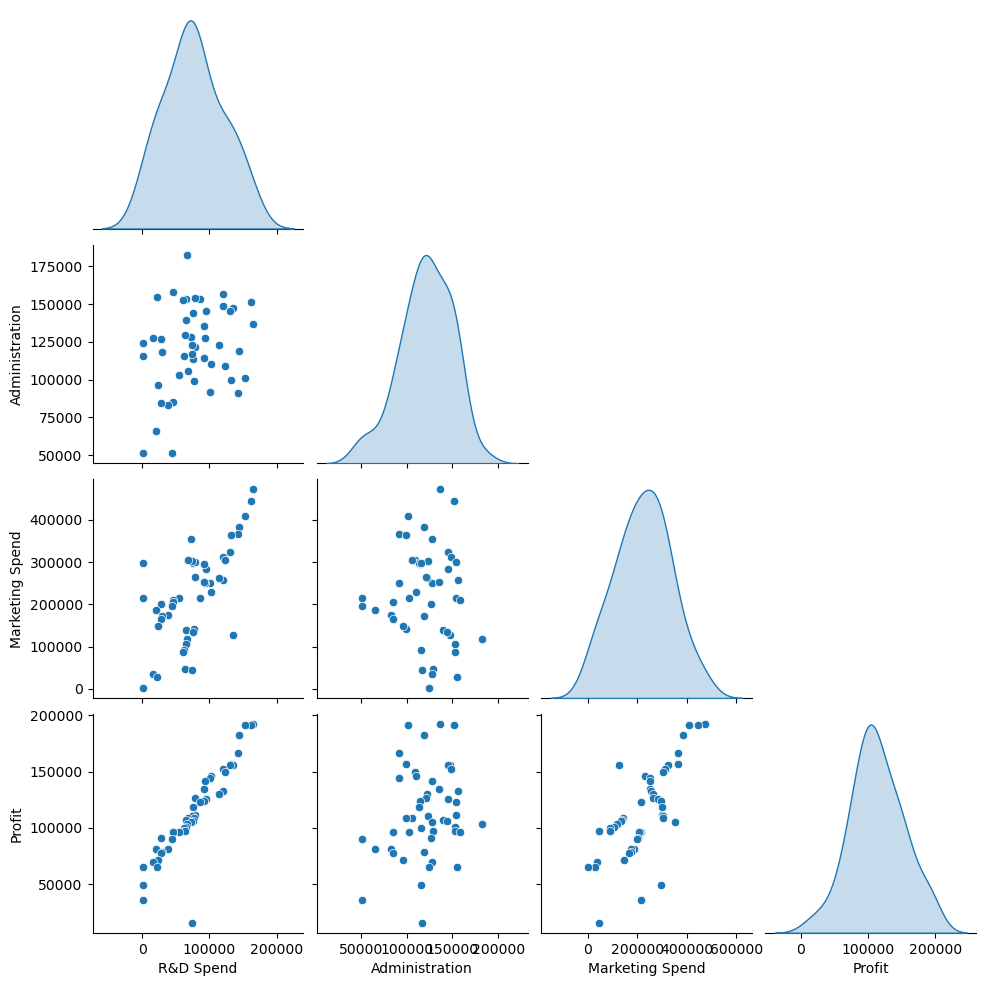

In [22]:
sns.pairplot(data = Start,corner=True,diag_kind='kde')
plt.show()

C:\Users\Anup0\AppData\Local\Temp\ipykernel_12976\707516615.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Start.corr(),vmax = 1,vmin=-1,annot=True,cmap='BuPu')


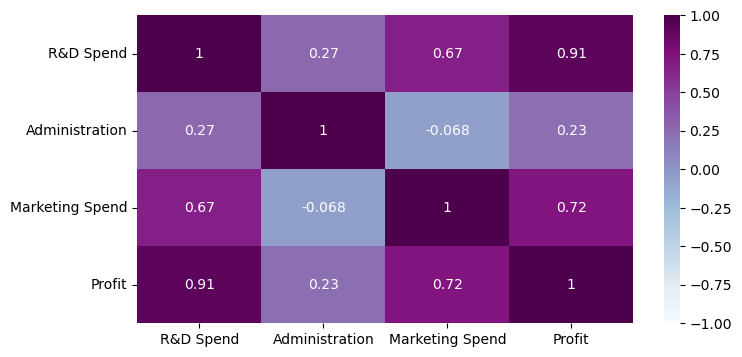

In [23]:
plt.figure(figsize=(8,4))
sns.heatmap(Start.corr(),vmax = 1,vmin=-1,annot=True,cmap='BuPu')
plt.show()

In [24]:
#Create dummies for 'State':
Start_1 = pd.get_dummies(Start, columns=['State'], drop_first=True)
Start_1.head()


,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [25]:
#Z-score normlization:
scaler = StandardScaler()
Start_new = scaler.fit_transform(Start_1)
Start_50 = pd.DataFrame(Start_new, columns=Start_1.columns)
Start_50.tail()


,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
44,-1.259605,1.207733,-1.782691,-1.237575,-0.696311,-0.728869
45,-1.748536,0.110786,-2.023386,-1.244609,-0.696311,1.371989
46,-1.741258,-0.187555,0.664985,-1.640509,1.436141,-0.728869
47,-1.759114,-2.480464,-0.086126,-1.994910,-0.696311,1.371989
48,-0.063298,-0.145772,-1.629351,-2.507251,-0.696311,-0.728869


In [26]:
#Renaming the columns:
new_column_names = {'R&D Spend': 'RnD', 'Marketing Spend': 'Marketing' , 'State_New York':'State_NewYork'}
Start_50.rename(columns=new_column_names, inplace=True)

In [28]:
Y = Start_50['Profit']
X = Start_50.drop('Profit',axis = 1)

In [29]:
#Checking for Multi-coliniarity:
def vif_cal(input_data):
    x_var = input_data
    x_cols = input_data.columns
    for i in range(0,x_cols.shape[0]):
        y = x_var[x_cols[i]]
        x = x_var[x_cols.drop(x_cols[i])]
        rsq = smf.ols(formula = 'y~x',data = x_var).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(x_cols[i], 'VIF = ', vif)

In [30]:
vif_cal(X)  
# None >10

RnD VIF =  2.27
Administration VIF =  1.24
Marketing VIF =  2.19
State_Florida VIF =  1.42
State_NewYork VIF =  1.39


## Creating models:

In [31]:
#Build Model
model_1 = smf.ols('Profit~RnD+Administration+Marketing+State_Florida+State_NewYork',data=Start_50).fit()

In [32]:
m1_r= model_1.rsquared
m1_ar = model_1.rsquared_adj
print('rsquared : ',m1_r,'& adj rsquared : ',m1_ar)

rsquared :  0.8575191650762571 & adj rsquared :  0.8409516261316359


## Normality test for Residuals


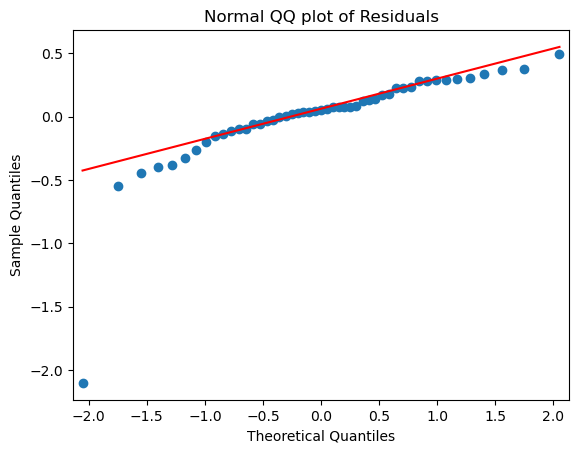

In [38]:
qqplot = sm.qqplot(model_1.resid,line = 'q')
plt.title("Normal QQ plot of Residuals")
plt.show()

In [43]:
list(np.where(model_1.resid<-1))

[array([48], dtype=int64)]

In [44]:
#Dropping row no 48 to improve model:
index_label_to_drop = 48
Start_test = Start_50.drop(index_label_to_drop)
Start_test.tail()

,RnD,Administration,Marketing,Profit,State_Florida,State_NewYork
43,-1.413644,0.226347,-1.717128,-1.120650,-0.696311,1.371989
44,-1.259605,1.207733,-1.782691,-1.237575,-0.696311,-0.728869
45,-1.748536,0.110786,-2.023386,-1.244609,-0.696311,1.371989
46,-1.741258,-0.187555,0.664985,-1.640509,1.436141,-0.728869
47,-1.759114,-2.480464,-0.086126,-1.994910,-0.696311,1.371989


In [51]:
#Building Models:
model_a = smf.ols('Profit~RnD+Administration+Marketing+State_Florida+State_NewYork',data=Start_test).fit()
ma_r= model_a.rsquared
ma_ar = model_a.rsquared_adj
print('rsquared : ',ma_r,'& adj rsquared : ',ma_ar)

rsquared :  0.9579629274879735 & adj rsquared :  0.9529585140936846


In [52]:
model_b = smf.ols('Profit~RnD+Administration+Marketing',data=Start_test).fit()
mb_r= model_b.rsquared
mb_ar = model_b.rsquared_adj
print('rsquared : ',mb_r,'& adj rsquared : ',mb_ar)

rsquared :  0.9569354212683144 & adj rsquared :  0.953999199991154


In [53]:
model_c = smf.ols('Profit~RnD+Marketing',data=Start_test).fit()
mc_r= model_c.rsquared
mc_ar = model_c.rsquared_adj
print('rsquared : ',mc_r,'& adj rsquared : ',mc_ar)

rsquared :  0.9566325965880252 & adj rsquared :  0.9547051564363819


In [54]:
model_d = smf.ols('Profit~RnD',data=Start_test).fit()
md_r= model_d.rsquared
md_ar = model_d.rsquared_adj
print('rsquared : ',md_r,'& adj rsquared : ',md_ar)

rsquared :  0.9553135773503675 & adj rsquared :  0.9543421333797233


In [59]:
model_e = smf.ols('Profit~Marketing',data=Start_test).fit()
me_r= model_e.rsquared
me_ar = model_e.rsquared_adj
print('rsquared : ',me_r,'& adj rsquared : ',me_ar)

rsquared :  0.48906988124156725 & adj rsquared :  0.4779627047468187


In [60]:
data2 = {'Model': ['Model_a', 'Model_b', 'Model_c','Model_d','Model_e'],
        'R_Squared': [ma_r, mb_r, mc_r,md_r,me_r],
        'Adj_R_Squared': [ma_ar, mb_ar, mc_ar,md_ar,me_ar]}
Model_table_new = pd.DataFrame(data2)
Model_table_new

,Model,R_Squared,Adj_R_Squared
0,Model_a,0.957963,0.952959
1,Model_b,0.956935,0.953999
2,Model_c,0.956633,0.954705
3,Model_d,0.955314,0.954342
4,Model_e,0.489070,0.477963


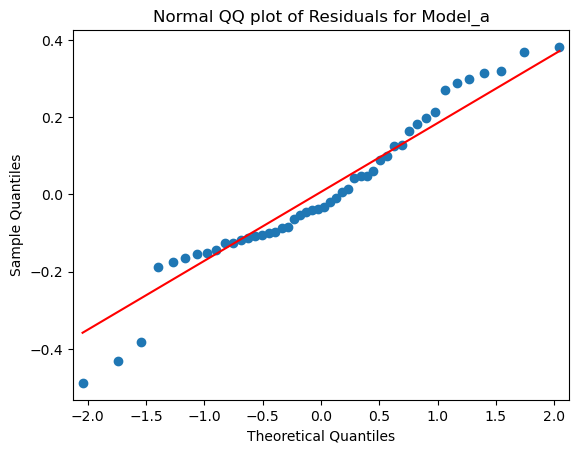

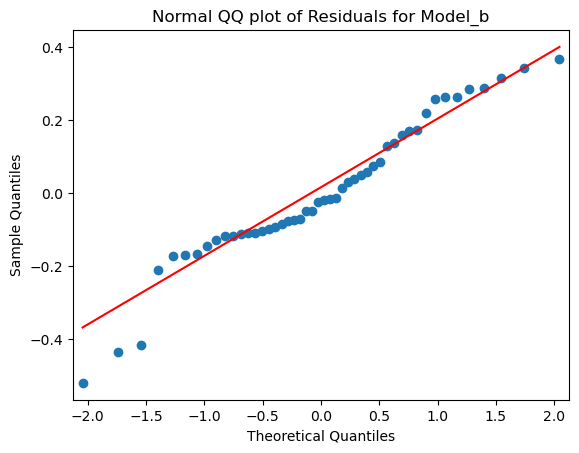

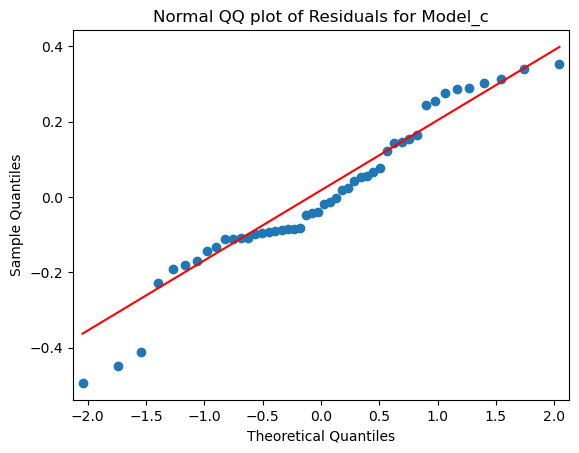

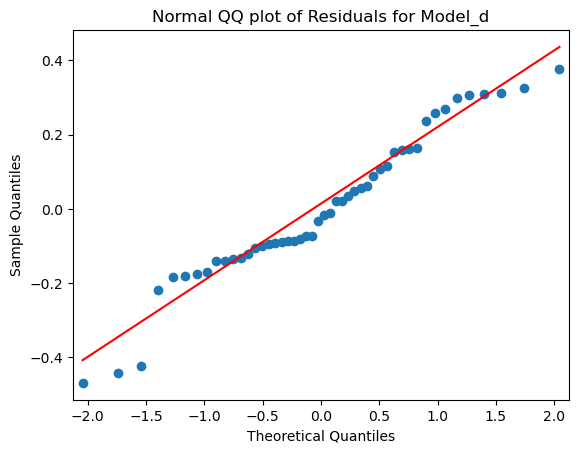

In [62]:
qqplot1 = sm.qqplot(model_a.resid,line = 'q')
plt.title("Normal QQ plot of Residuals for Model_a")

qqplot2 = sm.qqplot(model_b.resid,line = 'q')
plt.title("Normal QQ plot of Residuals for Model_b")

qqplot3 = sm.qqplot(model_c.resid,line = 'q')
plt.title("Normal QQ plot of Residuals for Model_c")

qqplot3 = sm.qqplot(model_d.resid,line = 'q')
plt.title("Normal QQ plot of Residuals for Model_d")

plt.show()

In [99]:
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           9.27e-28
Time:                        23:09:37   Log-Likelihood:                 10.826
No. Observations:                  48   AIC:                            -9.652
Df Residuals:                      42   BIC:                             1.575
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0504      0.030      1.690      0.098      -0.010       0.111
RnD                0.8862      0.046     19.426      0.000       0.794       0.978
Administration    -0.0159      0.033     -0.481      0.633      -0.083       0.051
Marketing          0.0452      0.046      0.985      0.330      -0.047       0.138
State_Florida     -0.0212      0.035     -0.600      0.552      -0.093       0.050
State_NewYork     -0.0355      0.035     -1.011      0.318      -0.106       0.035
==============================================================================
Omnibus:                        0.307   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.034
Skew:                          -0.058   Prob(JB):                        0.983
Kurtosis:                       3.059   Cond. No.                         2.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""